1) Pengumpulan data
Data dari https://archive.ics.uci.edu/dataset/45/heart+disease
*menggunakan cleveland

*pastikan data berasal dari sumber yg dpt dipercaya dan valid

2) Menelaah Data

*data berisi tentang faktor2 yg memengaruhi seseorang thdp penyakit jantung


In [1]:
# import library
import numpy as np
import pandas as pd
import re
import itertools

In [2]:
dir = "cleveland.data"

In [3]:
with open(dir, encoding='Latin1') as file:
  lines = [line.strip() for line in file]

lines[0:10]

['1 0 63 1 -9 -9 -9',
 '-9 1 145 1 233 -9 50 20',
 '1 -9 1 2 2 3 81 0',
 '0 0 0 0 1 10.5 6 13',
 '150 60 190 90 145 85 0 0',
 '2.3 3 -9 172 0 -9 -9 -9',
 '-9 -9 -9 6 -9 -9 -9 2',
 '16 81 0 1 1 1 -9 1',
 '-9 1 -9 1 1 1 1 1',
 '1 1 -9 -9 name']

In [4]:
# iterasi sesuai kolom & baris pd dataset

data = itertools.takewhile(
    lambda x: len(x) == 76,
    (' '.join(lines[i:(i + 10)]).split() for i in range (0, len(lines),10))
)

df = pd.DataFrame.from_records(data)

df.head()

,0,1,2,3,4,5,6,7,8,9,...,66,67,68,69,70,71,72,73,74,75
0,1,0,63,1,-9,-9,-9,-9,1,145,...,1,1,1,1,1,1,1,-9,-9,name
1,2,0,67,1,-9,-9,-9,-9,4,160,...,1,1,1,1,1,1,1,-9,-9,name
2,3,0,67,1,-9,-9,-9,-9,4,120,...,2,2,1,1,1,7,3,-9,-9,name
3,4,0,37,1,-9,-9,-9,-9,3,130,...,1,1,1,1,1,1,1,-9,-9,name
4,6,0,41,0,-9,-9,-9,-9,2,130,...,1,1,1,1,1,1,1,-9,-9,name


In [5]:
# informasi dataset yg telah dimasukan ke dlm dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282 entries, 0 to 281
Data columns (total 76 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       282 non-null    object
 1   1       282 non-null    object
 2   2       282 non-null    object
 3   3       282 non-null    object
 4   4       282 non-null    object
 5   5       282 non-null    object
 6   6       282 non-null    object
 7   7       282 non-null    object
 8   8       282 non-null    object
 9   9       282 non-null    object
 10  10      282 non-null    object
 11  11      282 non-null    object
 12  12      282 non-null    object
 13  13      282 non-null    object
 14  14      282 non-null    object
 15  15      282 non-null    object
 16  16      282 non-null    object
 17  17      282 non-null    object
 18  18      282 non-null    object
 19  19      282 non-null    object
 20  20      282 non-null    object
 21  21      282 non-null    object
 22  22      282 non-null    ob

In [6]:
# penghapusan fitur nilai null disimbolkan -9.0
df = df.iloc[:,:-1]
df = df.drop(df.columns[0], axis=1)

In [7]:
# mengubah tipe data float jadi -9.0
df = df.astype(float)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282 entries, 0 to 281
Data columns (total 74 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       282 non-null    float64
 1   2       282 non-null    float64
 2   3       282 non-null    float64
 3   4       282 non-null    float64
 4   5       282 non-null    float64
 5   6       282 non-null    float64
 6   7       282 non-null    float64
 7   8       282 non-null    float64
 8   9       282 non-null    float64
 9   10      282 non-null    float64
 10  11      282 non-null    float64
 11  12      282 non-null    float64
 12  13      282 non-null    float64
 13  14      282 non-null    float64
 14  15      282 non-null    float64
 15  16      282 non-null    float64
 16  17      282 non-null    float64
 17  18      282 non-null    float64
 18  19      282 non-null    float64
 19  20      282 non-null    float64
 20  21      282 non-null    float64
 21  22      282 non-null    float64
 22  23

3) Validasi Data

*data yg diperoleh dpt dipastikan valid, sebab data diperoleh pd sumber yg terpercaya

*data yg kosong/null akan teridentifikasi dg nilai -9.0, maka diganti jadi nilai null sesuai dataset

In [9]:
# mengubah nilai -9.0 jadi nilai null sesuai deskripsi dataset
df.replace(-9.0, np.nan, inplace=True)

In [10]:
# menghitung jml null value
df.isnull().sum()

1       0
2       0
3       0
4     282
5     282
     ... 
70      0
71      0
72      0
73    282
74    282
Length: 74, dtype: int64

In [11]:
df.head()

,1,2,3,4,5,6,7,8,9,10,...,65,66,67,68,69,70,71,72,73,74
0,0.0,63.0,1.0,NaN,NaN,NaN,NaN,1.0,145.0,1.0,...,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN
1,0.0,67.0,1.0,NaN,NaN,NaN,NaN,4.0,160.0,1.0,...,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN
2,0.0,67.0,1.0,NaN,NaN,NaN,NaN,4.0,120.0,1.0,...,NaN,2.0,2.0,1.0,1.0,1.0,7.0,3.0,NaN,NaN
3,0.0,37.0,1.0,NaN,NaN,NaN,NaN,3.0,130.0,0.0,...,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN
4,0.0,41.0,0.0,NaN,NaN,NaN,NaN,2.0,130.0,1.0,...,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282 entries, 0 to 281
Data columns (total 74 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       282 non-null    float64
 1   2       282 non-null    float64
 2   3       282 non-null    float64
 3   4       0 non-null      float64
 4   5       0 non-null      float64
 5   6       0 non-null      float64
 6   7       0 non-null      float64
 7   8       282 non-null    float64
 8   9       282 non-null    float64
 9   10      282 non-null    float64
 10  11      282 non-null    float64
 11  12      0 non-null      float64
 12  13      277 non-null    float64
 13  14      277 non-null    float64
 14  15      282 non-null    float64
 15  16      23 non-null     float64
 16  17      282 non-null    float64
 17  18      282 non-null    float64
 18  19      282 non-null    float64
 19  20      282 non-null    float64
 20  21      282 non-null    float64
 21  22      280 non-null    float64
 22  23

4) Menentukan Object Data

*objek data yg dipilih adlh fitur yg kemungkinan krusial/penting dlm penyakit jantung

In [13]:
# memilih 14 fitur yg akan digunakan
df_selected = df.iloc[:, [1,2,7,8,10,14,17,30,36,38,39,42,49,56]]

In [14]:
df_selected.head()

,2,3,8,9,11,15,18,31,37,39,40,43,50,57
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0.0


In [15]:
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282 entries, 0 to 281
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   2       282 non-null    float64
 1   3       282 non-null    float64
 2   8       282 non-null    float64
 3   9       282 non-null    float64
 4   11      282 non-null    float64
 5   15      282 non-null    float64
 6   18      282 non-null    float64
 7   31      282 non-null    float64
 8   37      282 non-null    float64
 9   39      282 non-null    float64
 10  40      282 non-null    float64
 11  43      280 non-null    float64
 12  50      280 non-null    float64
 13  57      282 non-null    float64
dtypes: float64(14)
memory usage: 31.0 KB


In [16]:
# mengganti nama kolom sesuai dg 14 nama kolom pd deskripsi dataset
column_mapping = {
    2: "age",
    3: "sex",
    8: "cp",
    9: "trestbps",
    11: "chol",
    15: "fbs",
    18: "restecg",
    31: "thalach",
    37: "exang",
    39: "oldpeak",
    40: "slope",
    43: "ca",
    50: "thal",
    57: "target"
}

df_selected.rename (columns=column_mapping, inplace=True)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_2984\2336362687.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected.rename (columns=column_mapping, inplace=True)


In [17]:
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282 entries, 0 to 281
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       282 non-null    float64
 1   sex       282 non-null    float64
 2   cp        282 non-null    float64
 3   trestbps  282 non-null    float64
 4   chol      282 non-null    float64
 5   fbs       282 non-null    float64
 6   restecg   282 non-null    float64
 7   thalach   282 non-null    float64
 8   exang     282 non-null    float64
 9   oldpeak   282 non-null    float64
 10  slope     282 non-null    float64
 11  ca        280 non-null    float64
 12  thal      280 non-null    float64
 13  target    282 non-null    float64
dtypes: float64(14)
memory usage: 31.0 KB


In [18]:
# menghitung jml fitur pd dataset
df_selected.value_counts()

age   sex  cp   trestbps  chol   fbs  restecg  thalach  exang  oldpeak  slope  ca   thal  target
29.0  1.0  2.0  130.0     204.0  0.0  2.0      202.0    0.0    0.0      1.0    0.0  3.0   0.0       1
59.0  1.0  1.0  178.0     270.0  0.0  2.0      145.0    0.0    4.2      3.0    0.0  7.0   0.0       1
           4.0  138.0     271.0  0.0  2.0      182.0    0.0    0.0      1.0    0.0  3.0   0.0       1
                135.0     234.0  0.0  0.0      161.0    0.0    0.5      2.0    0.0  7.0   0.0       1
                110.0     239.0  0.0  2.0      142.0    1.0    1.2      2.0    1.0  7.0   2.0       1
                                                                                                   ..
51.0  1.0  4.0  140.0     298.0  0.0  0.0      122.0    1.0    4.2      2.0    3.0  7.0   3.0       1
                          299.0  0.0  0.0      173.0    1.0    1.6      1.0    0.0  7.0   1.0       1
52.0  0.0  3.0  136.0     196.0  0.0  2.0      169.0    0.0    0.1      2.0    0.0  3.0

5) Membersihkan Data

*fitur yg akan digunakan mayoritas tdk ada nnilai null/kosong

*hanya ada 2 fitur ('ca' dan 'thal', dg 2 nilai null)

*karena fitur dg nilai null tdk banyak dan nilai null dari msg2 fitur sedikit, maka tdk perlu dilakukan penghapusan dg fungsi drop

*gunakan mean agar nilai null yg tersisa menjadi 0

In [19]:
# menghitung jml null values di dlm dataset
df_selected.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          2
thal        2
target      0
dtype: int64



*   karena fitur yg punya nilai null hanya sedikit maka tdk perlu dilakukan penghapusan dg fungsi drop





In [20]:
# msh ada nilai null di bbrp kolom, gunakan nilai mean di tiap kolom

meanca = df_selected['ca'].dropna()
meanthal = df_selected['thal'].dropna()


meanca = meanca.astype(float)
meanthal = meanthal.astype(float)

meanca = round(meanca.mean())
meanthal = round(meanthal.mean())


In [21]:
# mengubah nilai null jadi nilai mean yg sudah ditentukan sblmnya
fill_values = {'ca': meanca, 'thal': meanthal}
dfClean = df_selected.fillna(value=fill_values)

dfClean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282 entries, 0 to 281
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       282 non-null    float64
 1   sex       282 non-null    float64
 2   cp        282 non-null    float64
 3   trestbps  282 non-null    float64
 4   chol      282 non-null    float64
 5   fbs       282 non-null    float64
 6   restecg   282 non-null    float64
 7   thalach   282 non-null    float64
 8   exang     282 non-null    float64
 9   oldpeak   282 non-null    float64
 10  slope     282 non-null    float64
 11  ca        282 non-null    float64
 12  thal      282 non-null    float64
 13  target    282 non-null    float64
dtypes: float64(14)
memory usage: 31.0 KB


In [22]:
dfClean.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [23]:
# pengecekan thd duplikasi data
duplicate_rows = dfClean.duplicated()
dfClean[duplicate_rows]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target


Tidak ada duplikasi data

In [24]:
print("All Duplicate Rows:")
dfClean[dfClean.duplicated(keep=False)]

All Duplicate Rows:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target


In [25]:
# Menghapus data yang memiliki duplikat
# Karena data tdk ada duplikat maka dpt dilewati

# dfClean = dfClean.drop_duplicates()
# print("All Duplicate Rows:")
# dfClean[dfClean.duplicated(keep=False)]

# dfClean.head()

In [26]:
dfClean['target'].value_counts()

0.0    157
1.0     50
3.0     32
2.0     31
4.0     12
Name: target, dtype: int64

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

In [28]:
# Mencari korelasi antar fitur
dfClean.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.091125,0.077383,0.274466,0.218295,0.104400,0.134438,-0.393266,0.087174,0.195740,0.156108,0.353728,0.103751,0.210747
sex,-0.091125,1.000000,0.022619,-0.058920,-0.189397,0.054396,0.032665,-0.054792,0.189095,0.103771,0.040438,0.095005,0.389126,0.239516
cp,0.077383,0.022619,1.000000,-0.070886,0.098889,-0.071550,0.061007,-0.318512,0.364757,0.173221,0.147143,0.208906,0.259609,0.383891
trestbps,0.274466,-0.058920,-0.070886,1.000000,0.157118,0.142902,0.128652,-0.029739,0.061072,0.197026,0.137713,0.080754,0.122973,0.151776
chol,0.218295,-0.189397,0.098889,0.157118,1.000000,0.019506,0.166490,-0.018392,0.088988,0.044771,0.000546,0.129764,0.040570,0.098895
fbs,0.104400,0.054396,-0.071550,0.142902,0.019506,1.000000,0.054025,0.019948,0.027573,-0.024812,0.056060,0.117625,0.064050,0.039690
restecg,0.134438,0.032665,0.061007,0.128652,0.166490,0.054025,1.000000,-0.082132,0.088781,0.107675,0.155901,0.112083,0.020806,0.187365
thalach,-0.393266,-0.054792,-0.318512,-0.029739,-0.018392,0.019948,-0.082132,1.000000,-0.374316,-0.344748,-0.384825,-0.254544,-0.256681,-0.396194
exang,0.087174,0.189095,0.364757,0.061072,0.088988,0.027573,0.088781,-0.374316,1.000000,0.285568,0.263093,0.151577,0.334712,0.398880
oldpeak,0.195740,0.103771,0.173221,0.197026,0.044771,-0.024812,0.107675,-0.344748,0.285568,1.000000,0.600446,0.253958,0.331229,0.487529


<AxesSubplot:>

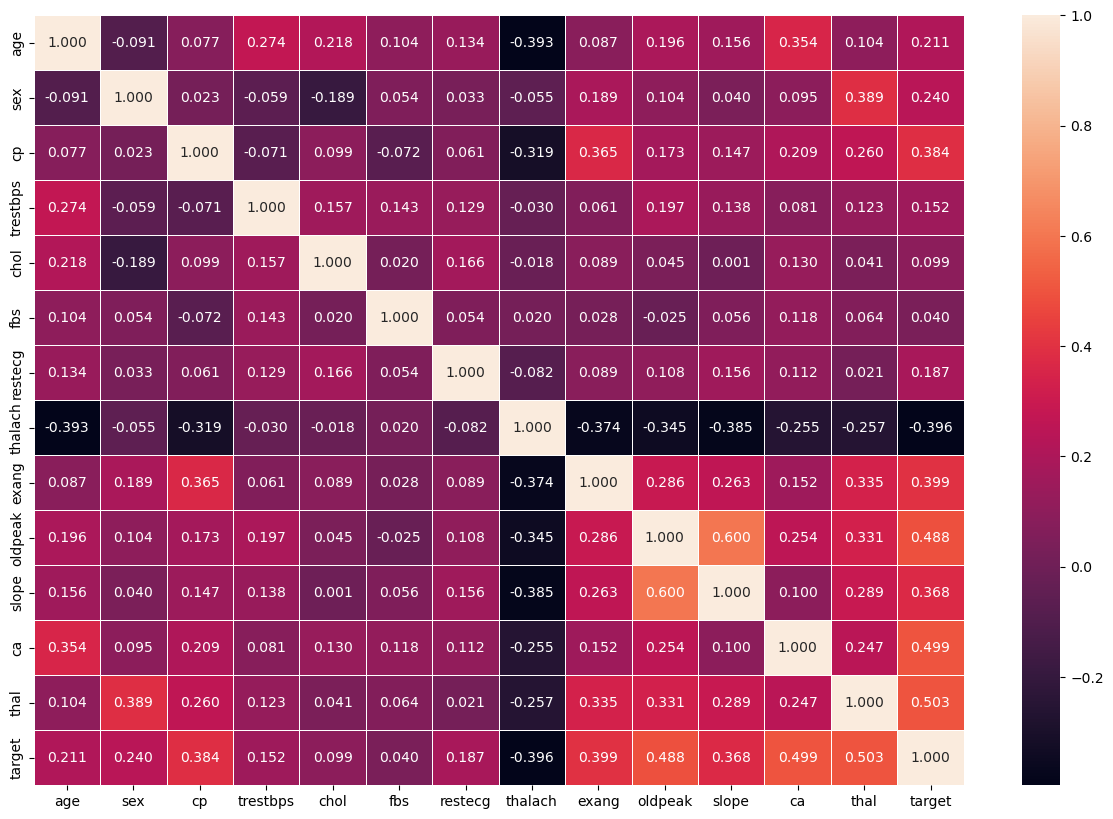

In [29]:
cor_mat=dfClean.corr()
fig,ax=plt.subplots(figsize=(15,10))
sns.heatmap(cor_mat,annot=True,linewidths=0.5,fmt=".3f")

6) Konstruksi Data

*dlm kasus ini, tdk perlu u/ menambahkan fitur baru

In [30]:
# bertujuan u/ menyesuaikan semua tipe data di dlm dataset
# dlm tahap ini dataset sdh punya tipe data yg sama, shg tdk dilakukan penyesuaian lagi
dfClean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282 entries, 0 to 281
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       282 non-null    float64
 1   sex       282 non-null    float64
 2   cp        282 non-null    float64
 3   trestbps  282 non-null    float64
 4   chol      282 non-null    float64
 5   fbs       282 non-null    float64
 6   restecg   282 non-null    float64
 7   thalach   282 non-null    float64
 8   exang     282 non-null    float64
 9   oldpeak   282 non-null    float64
 10  slope     282 non-null    float64
 11  ca        282 non-null    float64
 12  thal      282 non-null    float64
 13  target    282 non-null    float64
dtypes: float64(14)
memory usage: 31.0 KB


In [31]:
dfClean.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0.0


7) Menentukan Label Data

In [32]:
# memisahkan fitur & target lalu simpan ke variabel
X = dfClean.drop('target',axis=1).values
y = dfClean.iloc[:,-1]

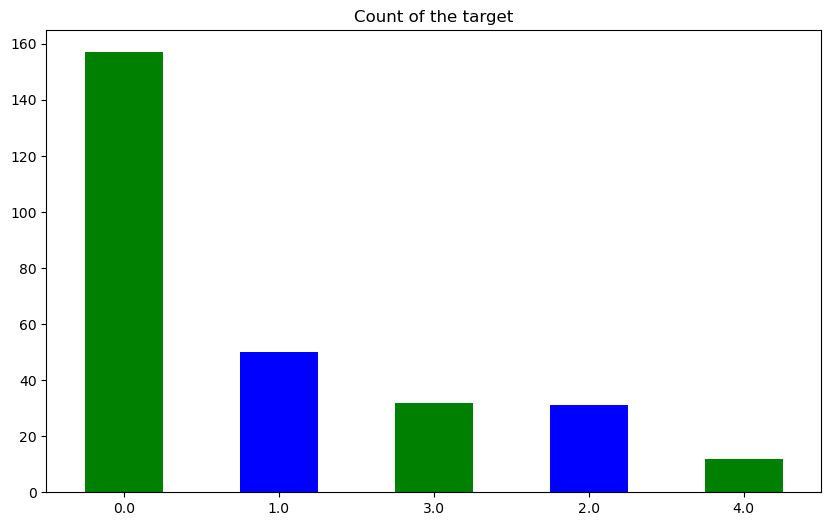

In [33]:
# cek persebaran jml target
dfClean['target'].value_counts().plot(kind='bar', figsize=(10,6), color=['green','blue'])
plt.title('Count of the target')
plt.xticks(rotation=0);



*   grafik menunjukan persebaran target tdk seimbang, perlu diseimbangkan
*   penyeimbangan ada 2, oversampilng & under sampling

  ***Oversampling***, jika jml dataset sedikit
  
   ***Undersampling***, jika jmml dataset terlalu banyak


*   Dlm case ini akan melakukan ***Oversampling*** krn data tdk banyak, dg menggunakan metode SMOTE

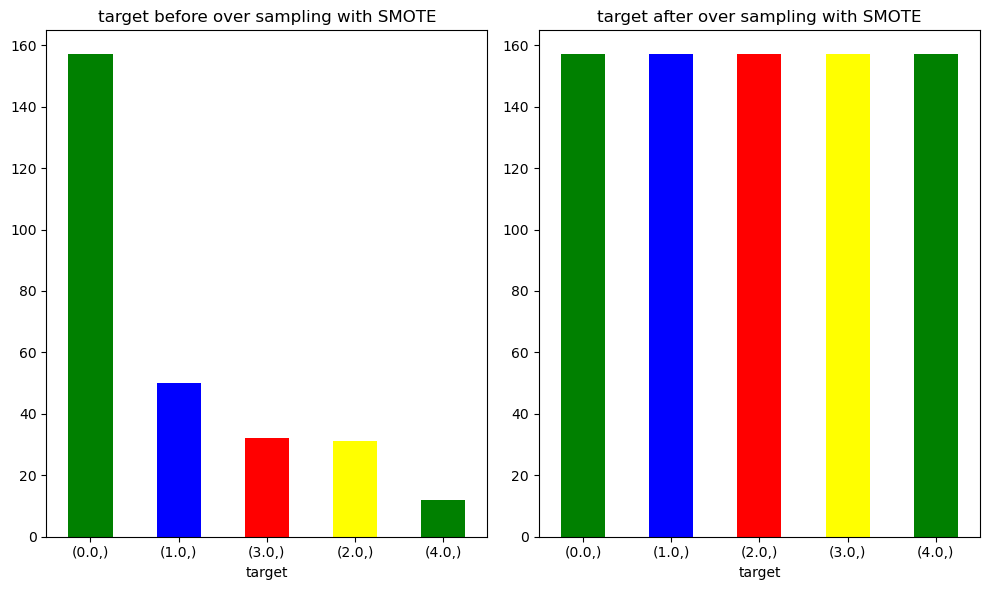

In [34]:
from imblearn.over_sampling import SMOTE

# oversampling
smote = SMOTE(random_state=42)
X_smote_resampled, y_smote_resampled = smote.fit_resample(X, y)

plt.figure(figsize=(12, 4))

new_df1 = pd.DataFrame(data=y)

plt.subplot(1, 2, 1)
new_df1.value_counts().plot(kind='bar', figsize=(10,6), color=['green','blue','red','yellow'])
plt.title('target before over sampling with SMOTE')
plt.xticks(rotation=0);

plt.subplot(1, 2, 2)
new_df2 = pd.DataFrame(data=y_smote_resampled)

new_df2.value_counts().plot(kind='bar', figsize=(10,6), color=['green','blue','red','yellow'])
plt.title('target after over sampling with SMOTE')
plt.xticks(rotation=0);

plt.tight_layout()
plt.show()

In [35]:
new_df1 = pd.DataFrame(data=y)
new_df1.value_counts()

target
0.0       157
1.0        50
3.0        32
2.0        31
4.0        12
dtype: int64

In [36]:
# over
new_df2 = pd.DataFrame(data=y_smote_resampled)
new_df2.value_counts()

target
0.0       157
1.0       157
2.0       157
3.0       157
4.0       157
dtype: int64

In [37]:
# cek apakah perlu normalisai/ standarisasi
dfClean.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000
mean,54.411348,0.677305,3.163121,131.563830,249.092199,0.148936,1.014184,149.765957,0.326241,1.026950,1.585106,0.666667,4.680851,0.907801
std,9.053083,0.468338,0.955405,17.757496,51.217546,0.356658,0.998118,22.923869,0.469670,1.138825,0.609700,0.933113,1.932377,1.224894
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,55.000000,1.000000,3.000000,130.000000,244.000000,0.000000,2.000000,153.500000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,277.000000,0.000000,2.000000,165.750000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


In [38]:
# rentang cukup jauh pd standar deviasi tiap fitur
# perlu normalisai/ standarisasi u/ memperkecil standar deviasi tiap kolom

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_smote_resampled_normal = scaler.fit_transform(X_smote_resampled)

len(X_smote_resampled)

785

In [39]:
dfcek1 = pd.DataFrame(X_smote_resampled_normal)
dfcek1.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000
mean,0.559445,0.780664,0.811789,0.374596,0.285383,0.140162,0.602946,0.542237,0.456058,0.238072,0.381666,0.349198,0.639917
std,0.168570,0.374983,0.283246,0.149340,0.111147,0.310030,0.440893,0.161073,0.443026,0.180516,0.258547,0.323277,0.423356
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.458333,0.659984,0.666667,0.264151,0.207870,0.000000,0.000000,0.422710,0.000000,0.091628,0.097991,0.000000,0.119594
50%,0.583333,1.000000,1.000000,0.358491,0.280822,0.000000,0.887086,0.543578,0.348039,0.225806,0.500000,0.333333,0.892559
75%,0.678864,1.000000,1.000000,0.469468,0.356164,0.000000,1.000000,0.668935,1.000000,0.368408,0.500000,0.657261,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [40]:
# membagi fitur & target jadi data train & data test
from sklearn.model_selection import train_test_split

# u/ yg oversample saja
X_train, X_test, y_train, y_test = train_test_split(X_smote_resampled, y_smote_resampled, test_size=0.2, random_state=42, stratify=y_smote_resampled)

# u/ yg oversample + normalisasi
X_train_normal, X_test_normal, y_train_normal, y_test_normal = train_test_split(X_smote_resampled_normal, y_smote_resampled, test_size=0.2, random_state=42, stratify=y_smote_resampled)

8) Model

In [41]:
from sklearn.metrics import accuracy_score,recall_score,f1_score,precision_score,roc_auc_score,confusion_matrix,precision_score
def evaluation(Y_test,Y_pred):
  acc = accuracy_score(Y_test,Y_pred)
  rcl = recall_score(Y_test,Y_pred,average = 'weighted')
  f1 = f1_score(Y_test,Y_pred,average = 'weighted')
  ps = precision_score(Y_test,Y_pred,average = 'weighted')

  metric_dict={'accuracy': round(acc,3),
               'recall': round(rcl,3),
               'F1 score': round(f1,3),
               'Precision score': round(ps,3)
               }
  return print(metric_dict)

Model KNN dg K = 3

In [42]:
# Model KNN dg K = 3
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

knn_model = KNeighborsClassifier(n_neighbors = 3)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [43]:
# menampilkan akurasi KNN
y_pred_knn = knn_model.predict(X_test)

# Evaluate KNN model
print('K-Nearest Neighbors (KNN) Model :')
accuracy_knn_smote = round(accuracy_score(y_test, y_pred_knn), 3)
print('Accuracy:', accuracy_knn_smote)
print('Classification Report:')
print(classification_report(y_test, y_pred_knn))

K-Nearest Neighbors (KNN) Model :
Accuracy: 0.701
Classification Report:
              precision    recall  f1-score   support

         0.0       0.56      0.56      0.56        32
         1.0       0.61      0.74      0.67        31
         2.0       0.79      0.84      0.81        31
         3.0       0.76      0.69      0.72        32
         4.0       0.84      0.68      0.75        31

    accuracy                           0.70       157
   macro avg       0.71      0.70      0.70       157
weighted avg       0.71      0.70      0.70       157



In [44]:
evaluation(y_test, y_pred_knn)

{'accuracy': 0.701, 'recall': 0.701, 'F1 score': 0.702, 'Precision score': 0.71}


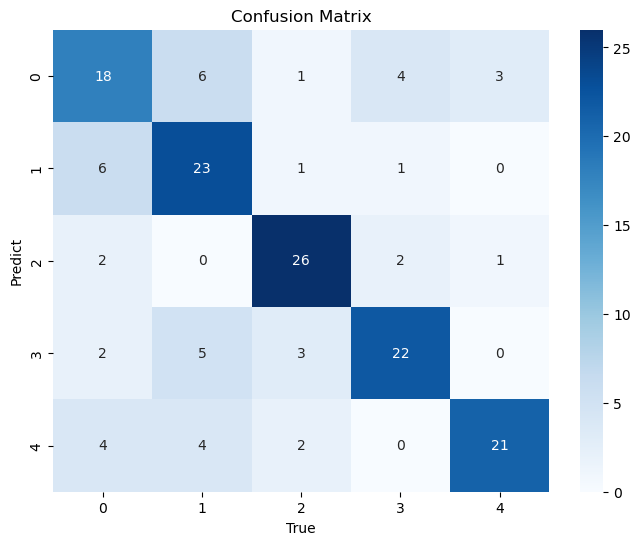

In [45]:
# visualisasi confusion matrix
cm = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

Random Forest

In [46]:
# random forest dg n-estimators = 100
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [47]:
# menampilkan akurasi random forest
y_pred_rf = rf_model.predict(X_test)

# Evaluate the Random Forest model
print("\nRandom Forest Model:")
accuracy_rf_smote = round(accuracy_score(y_test, y_pred_rf),3)
print("Accuracy:",accuracy_rf_smote)
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))


Random Forest Model:
Accuracy: 0.949
Classification Report:
              precision    recall  f1-score   support

         0.0       0.89      0.97      0.93        32
         1.0       1.00      0.87      0.93        31
         2.0       0.91      0.94      0.92        31
         3.0       0.97      0.97      0.97        32
         4.0       1.00      1.00      1.00        31

    accuracy                           0.95       157
   macro avg       0.95      0.95      0.95       157
weighted avg       0.95      0.95      0.95       157



In [48]:
evaluation(y_test, y_pred_rf)

{'accuracy': 0.949, 'recall': 0.949, 'F1 score': 0.949, 'Precision score': 0.952}


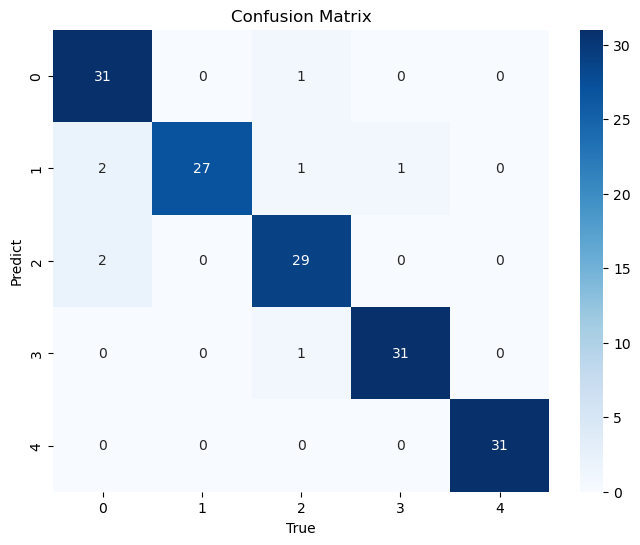

In [49]:
# visualisasi confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

XGBoost

In [50]:
xgb_model = XGBClassifier(learning_rate=0.1, n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [51]:
# menghitung akurasi xgboost
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the XGBoost model
print("\nXGBoost Model:")
accuracy_xgb_smote = round(accuracy_score(y_test, y_pred_xgb),3)
print("Accuracy:",accuracy_xgb_smote)
print("Classification Report:")
print(classification_report(y_test, y_pred_xgb))



XGBoost Model:
Accuracy: 0.885
Classification Report:
              precision    recall  f1-score   support

         0.0       0.83      0.94      0.88        32
         1.0       0.89      0.77      0.83        31
         2.0       0.87      0.87      0.87        31
         3.0       0.88      0.88      0.88        32
         4.0       0.97      0.97      0.97        31

    accuracy                           0.89       157
   macro avg       0.89      0.89      0.88       157
weighted avg       0.89      0.89      0.88       157



In [52]:
evaluation(y_test, y_pred_xgb)

{'accuracy': 0.885, 'recall': 0.885, 'F1 score': 0.885, 'Precision score': 0.887}


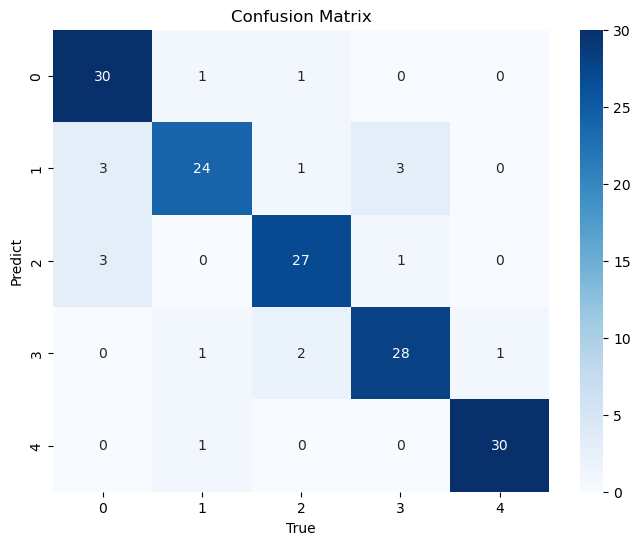

In [53]:
# visualisasi
cm = confusion_matrix(y_test, y_pred_xgb)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

***Oversample + Normalisasi***

KNN

In [54]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

KNeighborsClassifier(n_neighbors=3)
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train_normal, y_train_normal)

KNeighborsClassifier(n_neighbors=3)

In [55]:
# hasil prediksi
y_pred_knn = knn_model.predict(X_test_normal)

# Evaluate the KNN model
print("K-Nearest Neighbors (KNN) Model:")
accuracy_knn_smote_normal = round(accuracy_score(y_test_normal,y_pred_knn),3)
print("Accuracy:", accuracy_knn_smote_normal)
print("Classification Report:")
print(classification_report(y_test_normal, y_pred_knn))

K-Nearest Neighbors (KNN) Model:
Accuracy: 0.822
Classification Report:
              precision    recall  f1-score   support

         0.0       0.92      0.75      0.83        32
         1.0       0.72      0.74      0.73        31
         2.0       0.74      0.84      0.79        31
         3.0       0.84      0.81      0.83        32
         4.0       0.91      0.97      0.94        31

    accuracy                           0.82       157
   macro avg       0.83      0.82      0.82       157
weighted avg       0.83      0.82      0.82       157



In [56]:
evaluation(y_test_normal, y_pred_knn)

{'accuracy': 0.822, 'recall': 0.822, 'F1 score': 0.822, 'Precision score': 0.827}


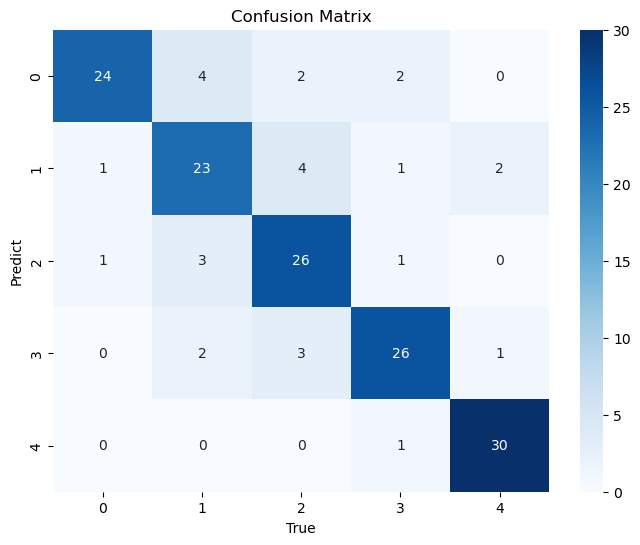

In [57]:
# visualisasi confusion matrix
cm = confusion_matrix(y_test_normal, y_pred_knn)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

Random Forest

In [58]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_normal, y_train_normal)

RandomForestClassifier(random_state=42)

In [59]:
# hasil predict
y_pred_rf = rf_model.predict(X_test_normal)

# Evaluate the Random Forest model
print("\nRandom Forest Model:")
accuracy_rf_smote_normal = round(accuracy_score(y_test_normal, y_pred_rf),3)
print("Accuracy:",accuracy_rf_smote_normal )
print("Classification Report:")
print(classification_report(y_test_normal, y_pred_rf))


Random Forest Model:
Accuracy: 0.949
Classification Report:
              precision    recall  f1-score   support

         0.0       0.89      0.97      0.93        32
         1.0       1.00      0.87      0.93        31
         2.0       0.91      0.94      0.92        31
         3.0       0.97      0.97      0.97        32
         4.0       1.00      1.00      1.00        31

    accuracy                           0.95       157
   macro avg       0.95      0.95      0.95       157
weighted avg       0.95      0.95      0.95       157



In [60]:
evaluation(y_test_normal, y_pred_rf)

{'accuracy': 0.949, 'recall': 0.949, 'F1 score': 0.949, 'Precision score': 0.952}


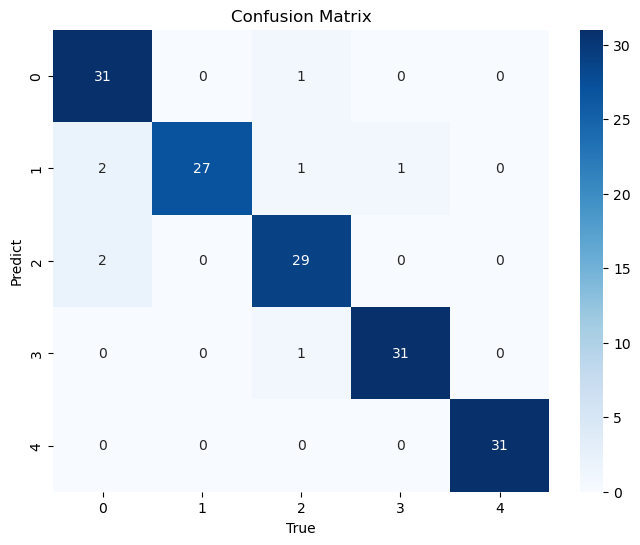

In [61]:
# visualisasi
cm = confusion_matrix(y_test_normal, y_pred_rf)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

XGBoost

In [62]:
xgb_model = XGBClassifier(learning_rate=0.1, n_estimators=100, random_state=42)
xgb_model.fit(X_train_normal, y_train_normal)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [63]:
# hsl predict
y_pred_xgb = xgb_model.predict(X_test_normal)

# Evaluate the XGBoost model
print("\nXGBoost Model:")
accuracy_xgb_smote_normal = round(accuracy_score(y_test_normal, y_pred_xgb),3)
print("Accuracy:",accuracy_xgb_smote_normal)
print("Classification Report:")
print(classification_report(y_test_normal, y_pred_xgb))


XGBoost Model:
Accuracy: 0.885
Classification Report:
              precision    recall  f1-score   support

         0.0       0.83      0.94      0.88        32
         1.0       0.89      0.77      0.83        31
         2.0       0.87      0.87      0.87        31
         3.0       0.88      0.88      0.88        32
         4.0       0.97      0.97      0.97        31

    accuracy                           0.89       157
   macro avg       0.89      0.89      0.88       157
weighted avg       0.89      0.89      0.88       157



In [64]:
evaluation(y_test_normal,y_pred_xgb)

{'accuracy': 0.885, 'recall': 0.885, 'F1 score': 0.885, 'Precision score': 0.887}


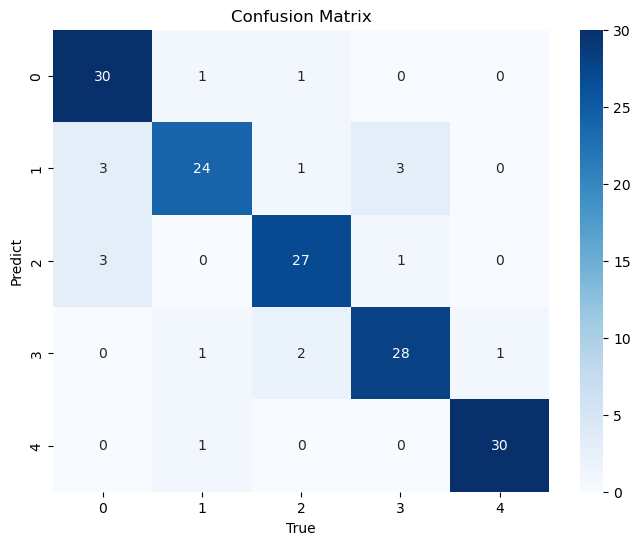

In [65]:
# visualisasi confusion matrix
cm = confusion_matrix(y_test_normal, y_pred_xgb)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

***Tunning + Normalisasi + Oversample***

In [66]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import RandomizedSearchCV # tunning

KNN

In [67]:
knn_model = KNeighborsClassifier()

param_grid = {
    "n_neighbors": range(3, 21),
    "metric": ["euclidean", "manhattan", "chebyshev"],
    "weights": ["uniform", "distance"],
    "algorithm": ["auto", "ball_tree", "kd_tree"],
    "leaf_size": range(10, 61),
    }

knn_model = RandomizedSearchCV(estimator=knn_model, param_distributions=param_grid, n_iter=100, scoring="accuracy", cv=5)

knn_model.fit(X_train_normal, y_train_normal)

best_params = knn_model.best_params_
print(f"Best parameters: {best_params}")


Best parameters: {'weights': 'distance', 'n_neighbors': 3, 'metric': 'manhattan', 'leaf_size': 17, 'algorithm': 'auto'}


In [68]:
# hsl predict
y_pred_knn = knn_model.predict(X_test_normal)

# Evaluate the KNN model
print("K-Nearest Neighbors (KNN) Model:")
accuracy_knn_smote_normal_Tun = round(accuracy_score(y_test_normal,y_pred_knn),3)
print("Accuracy:", accuracy_knn_smote_normal_Tun)
print("Classification Report:")
print(classification_report(y_test_normal, y_pred_knn))

K-Nearest Neighbors (KNN) Model:
Accuracy: 0.898
Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      0.84      0.90        32
         1.0       0.86      0.81      0.83        31
         2.0       0.86      0.97      0.91        31
         3.0       0.88      0.91      0.89        32
         4.0       0.94      0.97      0.95        31

    accuracy                           0.90       157
   macro avg       0.90      0.90      0.90       157
weighted avg       0.90      0.90      0.90       157



In [69]:
evaluation(y_test_normal, y_pred_knn)

{'accuracy': 0.898, 'recall': 0.898, 'F1 score': 0.897, 'Precision score': 0.9}


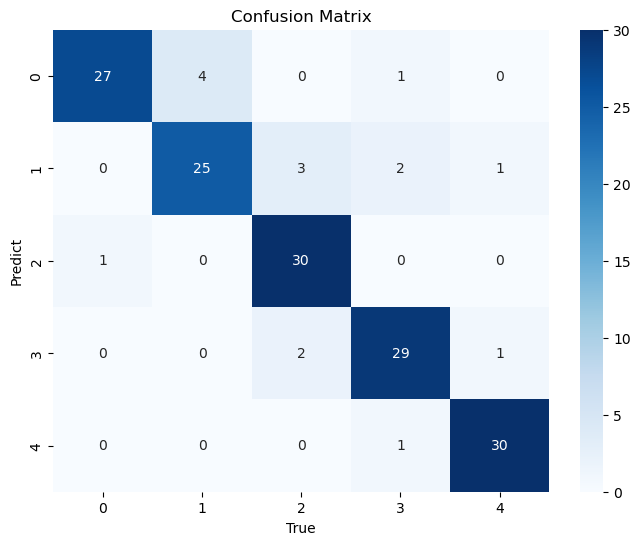

In [70]:
# visualisasi
cm = confusion_matrix(y_test_normal, y_pred_knn)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

***Random Forest***

In [71]:
rf_model = RandomForestClassifier()

param_grid = {
    "n_estimators": [100, 200],
    "max_depth": [ 10, 15],
    "min_samples_leaf": [1, 2],
    "min_samples_split": [2, 5],
    "max_features": ["sqrt", "log2"],
    # "random_state": [42, 100, 200]
    }

rf_model = RandomizedSearchCV(rf_model, param_grid, n_iter=100, cv=5, n_jobs=-1)

rf_model.fit(X_train_normal, y_train_normal)

best_params = rf_model.best_params_
print(f"Best parameters: {best_params}")

d:\ANACONDA\Anaconda_File2\lib\site-packages\sklearn\model_selection\_search.py:307: UserWarning: The total space of parameters 32 is smaller than n_iter=100. Running 32 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best parameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 15}


In [72]:
# hsl predict
y_pred_rf = rf_model.predict(X_test_normal)

# Evaluate the Random Forest model
print("\nRandom Forest Model:")
accuracy_rf_smote_normal_Tun = round(accuracy_score(y_test_normal, y_pred_rf),3)
print("Accuracy:",accuracy_rf_smote_normal_Tun)
print("Classification Report:")
print(classification_report(y_test_normal, y_pred_rf))


Random Forest Model:
Accuracy: 0.93
Classification Report:
              precision    recall  f1-score   support

         0.0       0.86      0.94      0.90        32
         1.0       0.96      0.87      0.92        31
         2.0       0.90      0.90      0.90        31
         3.0       0.94      0.97      0.95        32
         4.0       1.00      0.97      0.98        31

    accuracy                           0.93       157
   macro avg       0.93      0.93      0.93       157
weighted avg       0.93      0.93      0.93       157



In [73]:
evaluation(y_test_normal, y_pred_rf)

{'accuracy': 0.93, 'recall': 0.93, 'F1 score': 0.93, 'Precision score': 0.932}


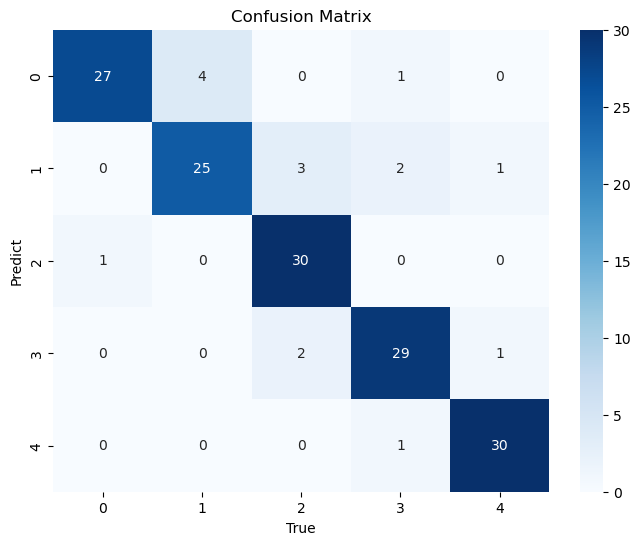

In [74]:
# visualisasi
cm = confusion_matrix(y_test_normal, y_pred_knn)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

***XGBoost***

In [75]:
xgb_model = XGBClassifier()

param_grid = {
    "max_depth": [3, 5, 7],
    "learning_rate": [0.01, 0.1],
    "n_estimators": [100, 200],
    "gamma": [0, 0.1],
    "colsample_bytree": [0.7, 0.8],
    }

xgb_model = RandomizedSearchCV(xgb_model, param_grid, n_iter=10, cv=5, n_jobs=-1)

xgb_model.fit(X_train_normal, y_train_normal)

best_params = xgb_model.best_params_
print(f"Best parameters: {best_params}")

Best parameters: {'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.1, 'gamma': 0.1, 'colsample_bytree': 0.8}


In [76]:
# hsl predict
y_pred_xgb = xgb_model.predict(X_test_normal)

# Evaluate the XGBoost model
print("\nXGBoost Model:")
accuracy_xgb_smote_normal_Tun = round(accuracy_score(y_test_normal, y_pred_xgb),3)
print("Accuracy:",accuracy_xgb_smote_normal_Tun)
print("Classification Report:")
print(classification_report(y_test_normal, y_pred_xgb))


XGBoost Model:
Accuracy: 0.866
Classification Report:
              precision    recall  f1-score   support

         0.0       0.83      0.94      0.88        32
         1.0       0.88      0.71      0.79        31
         2.0       0.81      0.84      0.83        31
         3.0       0.84      0.84      0.84        32
         4.0       0.97      1.00      0.98        31

    accuracy                           0.87       157
   macro avg       0.87      0.87      0.86       157
weighted avg       0.87      0.87      0.86       157



In [77]:
evaluation(y_test_normal, y_pred_xgb)

{'accuracy': 0.866, 'recall': 0.866, 'F1 score': 0.864, 'Precision score': 0.867}


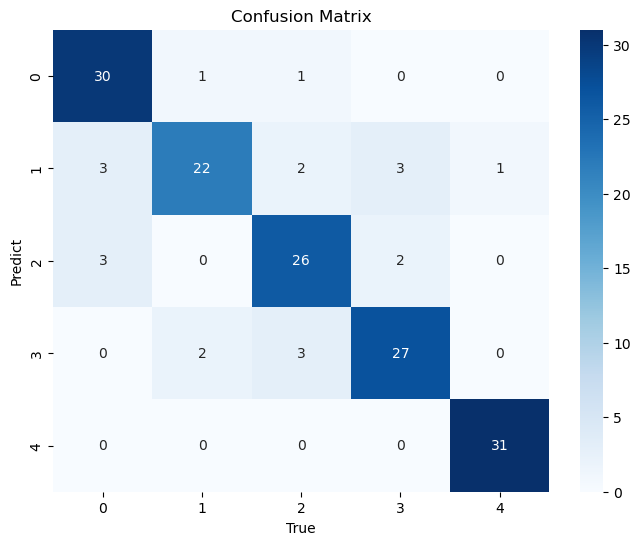

In [78]:
# visualisasi
cm = confusion_matrix(y_test_normal, y_pred_xgb)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

9) ***Evaluasi***

Evaluasi model dg data yg di ***Oversample***

In [79]:
import matplotlib.pyplot as plt

model_comp1 = pd.DataFrame({'Model': ['K-Nearest Neighbour','Random Forest',
'XGBoost'], 'Accuracy': [accuracy_knn_smote*100,
accuracy_rf_smote*100,accuracy_xgb_smote*100]})

model_comp1.head()

,Model,Accuracy
0,K-Nearest Neighbour,70.1
1,Random Forest,94.9
2,XGBoost,88.5


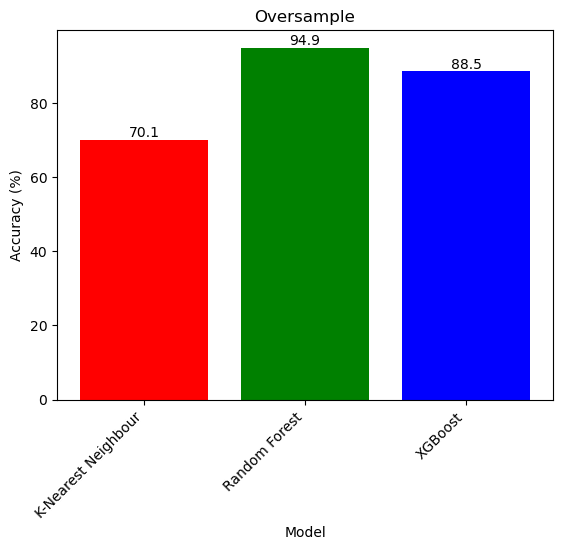

In [80]:
# Membuat bar plot dengan keterangan jumlah
fig, ax = plt.subplots()
bars = plt.bar(model_comp1['Model'], model_comp1['Accuracy'], color=['red', 'green', 'blue'])
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Oversample')
plt.xticks(rotation=45, ha='right') # Untuk memutar label sumbu x agar lebih mudah dibaca

# Menambahkan keterangan jumlah di atas setiap bar
for bar in bars:
  yval = bar.get_height()
  plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.show()

Evaluasi model dg data yg di ***Normalization + Oversampling***

In [81]:
model_comp2 = pd.DataFrame({'Model': ['K-Nearest Neighbour','Random Forest',
'XGBoost'], 'Accuracy': [accuracy_knn_smote_normal*100,
accuracy_rf_smote_normal*100,accuracy_xgb_smote_normal*100]})

model_comp2.head()

,Model,Accuracy
0,K-Nearest Neighbour,82.2
1,Random Forest,94.9
2,XGBoost,88.5


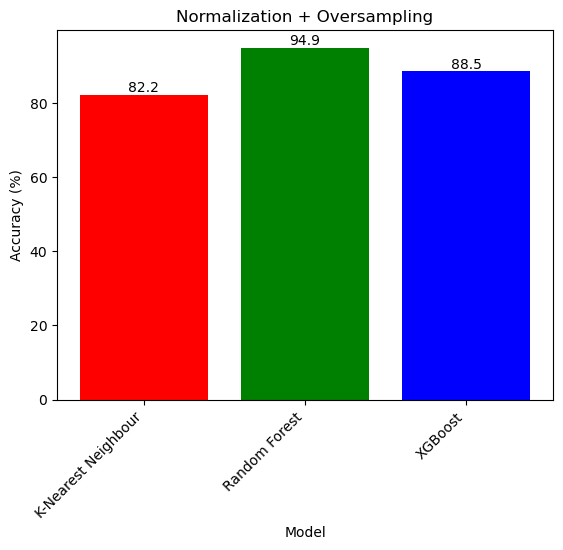

In [82]:
# Membuat bar plot dengan keterangan jumlah
fig, ax = plt.subplots()
bars = plt.bar(model_comp2['Model'], model_comp2['Accuracy'], color=['red', 'green', 'blue'])
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Normalization + Oversampling')
plt.xticks(rotation=45, ha='right') # Untuk memutar label sumbu x agar lebih mudah dibaca

# Menambahkan keterangan jumlah di atas setiap bar
for bar in bars:
  yval = bar.get_height()
  plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.show()

Evaluasi model dg data yg di ***Normalization + Oversampling + Tunning***

In [83]:
model_comp3 = pd.DataFrame({'Model': ['K-Nearest Neighbour','Random Forest',
'XGBoost'], 'Accuracy': [accuracy_knn_smote_normal_Tun*100,
accuracy_rf_smote_normal_Tun*100,accuracy_xgb_smote_normal_Tun*100]})

model_comp3.head()

,Model,Accuracy
0,K-Nearest Neighbour,89.8
1,Random Forest,93.0
2,XGBoost,86.6


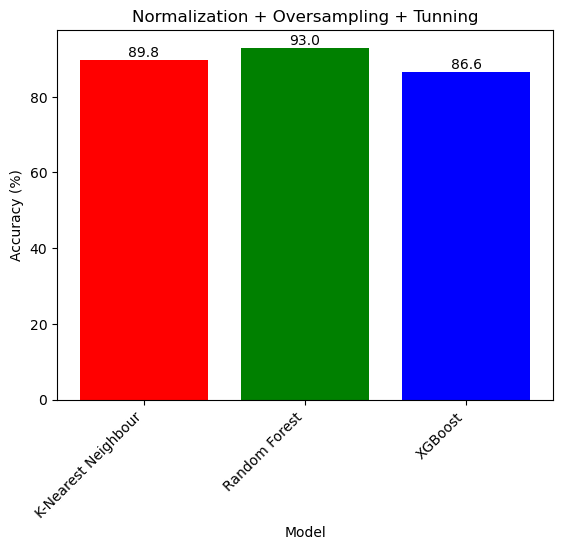

In [84]:
# Membuat bar plot dengan keterangan jumlah
fig, ax = plt.subplots()
bars = plt.bar(model_comp3['Model'], model_comp3['Accuracy'], color=['red', 'green', 'blue'])
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Normalization + Oversampling + Tunning')
plt.xticks(rotation=45, ha='right') # Untuk memutar label sumbu x agar lebih mudah dibaca

# Menambahkan keterangan jumlah di atas setiap bar
for bar in bars:
  yval = bar.get_height()
  plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.show()

***Mencari Best Model***

In [85]:
# Data frame
model_compBest = pd.DataFrame({
    'Model': ['K-Nearest Neighbour OverSample Tunning', 'Random Forest OverSample',
              'XGB OverSample Standarization Tunning'],
    'Accuracy': [accuracy_knn_smote_normal_Tun*100, accuracy_rf_smote_normal*100,
                 accuracy_xgb_smote_normal_Tun*100]
})

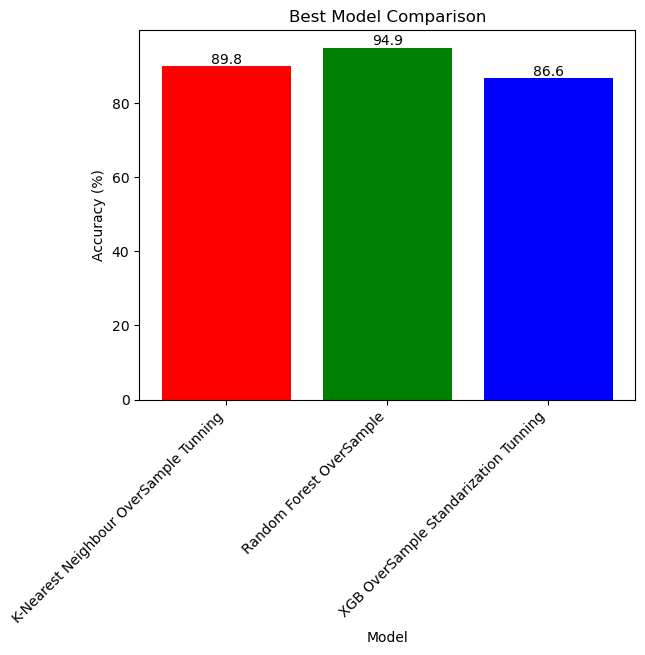

In [86]:
# Membuat bar plot dengan keterangan jumlah
fig, ax = plt.subplots()
bars = plt.bar(model_compBest['Model'], model_compBest['Accuracy'], color=['red', 'green', 'blue'])
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Best Model Comparison')
plt.xticks(rotation=45, ha='right') # Untuk memutar label sumbu x agar lebih mudah dibaca

# Menambahkan keterangan jumlah di atas setiap bar
for bar in bars:
  yval = bar.get_height()
  plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.show()

In [87]:
import pickle

# Save model dg pickle sblm deploy streamlit
with open('cleveland.pkl', 'wb') as model_file:
    pickle.dump(rf_model, model_file)